In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [73]:
data = pd.read_excel("/home/kilian/CSV-Excels/dataframeP2.xlsx")
countriesByZone = pd.read_excel("/home/kilian/Documents/OpenClassrooms/P2_alliot_kilian/EdStatsEXCEL.xlsx", sheet_name="Country", usecols=["Table Name","Region"])

## Grouper par zone géographique

In [74]:
countriesByZone[countriesByZone["Table Name"] == "British Virgin Islands"]

,Table Name,Region


In [75]:
data = data[data["Unnamed: 0"] != "British Virgin Islands"]

In [76]:
countriesByZone['Table Name'].replace({"Côte d'Ivoire": "Cote d'Ivoire"}, inplace=True)
countriesByZone['Table Name'].replace({"Curaçao": "Curacao"}, inplace=True)
countriesByZone['Table Name'].replace({"São Tomé and Principe": "Sao Tome and Principe"}, inplace=True)

In [77]:
countriesByZone.sort_values("Table Name", inplace=True)
data.sort_values("Unnamed: 0", inplace=True)

In [78]:
regions = countriesByZone.Region.values

In [79]:
data["Zone Géographique"] = regions

In [80]:
data.index = data['Unnamed: 0'].values
data.drop(columns=['Unnamed: 0'], inplace=True)

## Taux de completion des rows et supprimer les rows pas assez remplies (seuil 50%)

In [81]:
bigZones = data[data["Zone Géographique"].isnull()]

In [82]:
def check_row_completion():    
    full_columns = data.count(axis=1).values
    row_completion = (full_columns * 100 / len(data.columns)).round().astype(int)
    data["Completion (%)"] = row_completion

In [83]:
check_row_completion()

In [84]:
data = data[data["Completion (%)"] > 50]

In [85]:
data = data[~data["Zone Géographique"].isnull()]

## Population 15-24 : Moyenne de la part des 15-24 dans les autres pays

In [86]:
full_15_24 = data[data["Population 15-24 ans"].notnull()]
part_of_young_people = (full_15_24["Population 15-24 ans"] * 100) / full_15_24["Population totale"]
mean_part = part_of_young_people.values.mean()
data["Population 15-24 ans"].fillna(data["Population totale"] * (mean_part / 100), inplace=True)

## Pour les autres indicateurs : Moyennes de la zone geographique correspondante

In [87]:
# Faire un loop loc/fill/concat dataframe
zones = data["Zone Géographique"].unique()
loop_dataframe = pd.DataFrame()
for zone in zones:
    current_zone = data.loc[data["Zone Géographique"] == zone]
    current_zone.fillna(current_zone.describe().loc["mean",:], inplace=True)
    loop_dataframe = pd.concat([loop_dataframe, current_zone])

/home/kilian/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [88]:
data = loop_dataframe

In [89]:
data

,Population totale,Population 15-24 ans,Croissance de la population (%),PIB (US$),Dépenses dans l'éducation (%PIB),Taux d'alphabétisme chez les 15-24 ans (%),Déscolarisation des lycéens (%),Nombre d'inscriptions au lycée,Ratio élèves/professeurs au lycée,Accès à Internet (%),Dépenses dans les institutions secondaires et tertiaires (%PIB),Pourcentage d'inscriptions dans des institutions privées,Professeurs dans l'éducation secondaire et tertiaire,Zone Géographique,Completion (%)
Afghanistan,3.172728e+07,6.679801e+06,3.04,1.902638e+10,3.33,46.990000,52.030000,8.260400e+05,30.280000,6.60,0.00,11.765,7029.50,South Asia,100
Bangladesh,1.575596e+08,3.389908e+07,1.14,1.595204e+11,2.05,78.980000,61.030000,5.264895e+06,29.310000,9.48,1.07,69.210,265611.67,South Asia,100
Bhutan,7.639540e+05,1.510618e+05,1.58,1.892055e+09,5.51,87.320000,35.490000,1.608180e+04,13.090000,25.41,3.48,11.460,2225.00,South Asia,100
India,1.278133e+09,2.401628e+08,1.24,1.936154e+12,3.74,86.140000,47.780000,5.282696e+07,27.930000,17.40,2.59,52.570,3476942.67,South Asia,100
Maldives,3.928079e+05,7.393917e+04,2.12,3.353115e+09,4.45,99.270000,47.618571,9.415460e+06,24.402857,43.77,0.44,38.380,0.00,South Asia,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2.532354e+05,5.293017e+04,2.26,7.724763e+08,5.23,95.216875,23.784211,6.167000e+03,31.200000,14.89,1.60,7.610,0.00,East Asia & Pacific,86
Vietnam,8.978640e+07,1.777147e+07,1.07,1.661764e+11,5.28,95.216875,23.784211,2.920787e+06,18.586667,38.86,3.78,14.140,83126.83,East Asia & Pacific,71
Bermuda,6.502743e+04,1.115838e+04,-0.07,5.601608e+09,2.04,NaN,31.000000,2.234200e+03,6.050000,93.18,1.34,61.935,444.20,North America,86
Canada,3.513338e+07,4.452427e+06,1.09,1.706354e+12,5.32,NaN,20.170000,1.675808e+06,11.500000,85.36,2.86,7.180,147641.00,North America,86


## Rassembler des colonnes

In [90]:
data.columns

Index(['Population totale', 'Population 15-24 ans',
       'Croissance de la population (%)', 'PIB (US$)',
       'Dépenses dans l'éducation (%PIB)',
       'Taux d'alphabétisme chez les 15-24 ans (%)',
       'Déscolarisation des lycéens (%)', 'Nombre d'inscriptions au lycée',
       'Ratio élèves/professeurs au lycée', 'Accès à Internet (%)',
       'Dépenses dans les institutions secondaires et tertiaires (%PIB)',
       'Pourcentage d'inscriptions dans des institutions privées',
       'Professeurs dans l'éducation secondaire et tertiaire',
       'Zone Géographique', 'Completion (%)'],
      dtype='object')

In [91]:
#Canada, USa et Bermudes ont un taux d'alphabetisme à NaN : rechercher les pays ressemblants
# data.loc["Bermuda","Accès à Internet (%)"]
# data.loc["Bermuda","Déscolarisation des lycéens (%)"]
# data.loc["Bermuda","Dépenses dans l'éducation (%PIB)"]
# etc...

canada_like = data[(data["Accès à Internet (%)"].between(75,85)) & (data["Dépenses dans l'éducation (%PIB)"].between(4,6)) & (data["Déscolarisation des lycéens (%)"].between(5,15))]
usa_like = data[(data["Accès à Internet (%)"].between(68,78)) & (data["Dépenses dans l'éducation (%PIB)"].between(4,6)) & (data["Déscolarisation des lycéens (%)"].between(8,32))]
bermuda_like = data[(data["Accès à Internet (%)"].between(87,100)) & (data["Dépenses dans l'éducation (%PIB)"].between(0,4)) & (data["Déscolarisation des lycéens (%)"].between(10,50))]

alphab_canada_like = canada_like["Taux d'alphabétisme chez les 15-24 ans (%)"].mean()
alphab_usa_like = usa_like["Taux d'alphabétisme chez les 15-24 ans (%)"].mean()
alphab_bermuda_like = bermuda_like["Taux d'alphabétisme chez les 15-24 ans (%)"].mean()

data.loc["Canada","Taux d'alphabétisme chez les 15-24 ans (%)"] = alphab_canada_like
data.loc["United States","Taux d'alphabétisme chez les 15-24 ans (%)"] = alphab_usa_like
data.loc["Bermuda","Taux d'alphabétisme chez les 15-24 ans (%)"] = alphab_bermuda_like

In [92]:
# print(st.pearsonr(data["Accès à Internet (%)"],data["Déscolarisation des lycéens (%)"])[0]) #-0.7
# print(st.pearsonr(data["Professeurs dans l'éducation secondaire et tertiaire"],data["Nombre d'inscriptions au lycée"])[0]) #0.9
# print(st.pearsonr(data["Déscolarisation des lycéens (%)"],data["Croissance de la population (%)"])[0]) #0.5
# plt.plot(data["Déscolarisation des lycéens (%)"], data["Croissance de la population (%)"], "o")

In [93]:
data["Dépenses dans l'éducation (M$)"] = (data["PIB (US$)"] / 10**6) * (data["Dépenses dans l'éducation (%PIB)"] * 10**-2)

In [94]:
# Faire un point sur les indicateurs essentiels
data.drop(columns=["Professeurs dans l'éducation secondaire et tertiaire", "Ratio élèves/professeurs au lycée", "Pourcentage d'inscriptions dans des institutions privées", "Dépenses dans les institutions secondaires et tertiaires (%PIB)", "PIB (US$)", "Dépenses dans l'éducation (%PIB)", "Completion (%)", "Zone Géographique"], inplace=True)

## Analyse univariée

<AxesSubplot:ylabel='Frequency'>

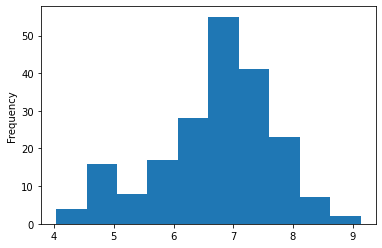

In [95]:
np.log10(data["Population totale"]).plot.hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7dd1003070>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7dd0d74d30>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f7dd1003fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7dd0d74760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7dd0e3cb50>],
 'means': [<matplotlib.lines.Line2D at 0x7f7dd0e3c400>]}

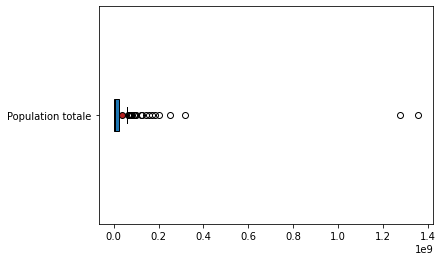

In [96]:
plt.boxplot([data["Population totale"]], labels=["Population totale"], medianprops = {'color':"black"},
            meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'},
           showfliers=True, vert=False, showmeans=True, patch_artist=True)

Distribution de la variable : Population 15-24 ans
count    2.010000e+02
mean     6.034479e+06
std      2.317521e+07
min      1.855897e+03
25%      2.168050e+05
50%      1.164389e+06
75%      4.427938e+06
max      2.401628e+08
Name: Population 15-24 ans, dtype: float64


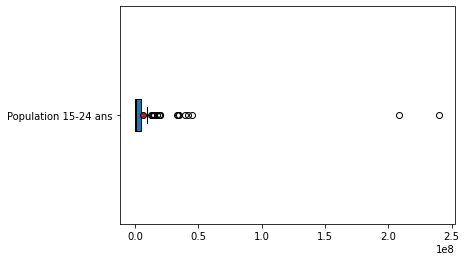

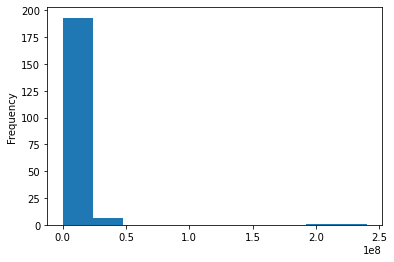

--------------------
Distribution de la variable : Croissance de la population (%)
count    201.000000
mean       1.413632
std        1.333529
min       -1.740000
25%        0.480000
50%        1.240000
75%        2.250000
max        6.850000
Name: Croissance de la population (%), dtype: float64


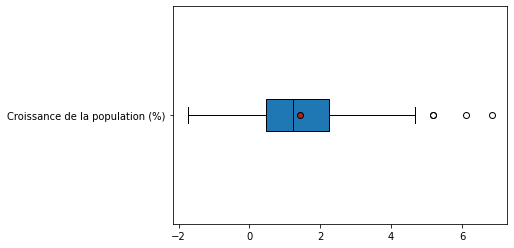

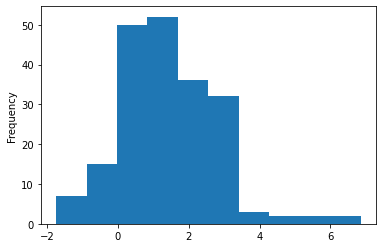

--------------------
Distribution de la variable : Taux d'alphabétisme chez les 15-24 ans (%)
count    201.000000
mean      91.141089
std       14.468963
min       23.520000
25%       88.710000
50%       98.143636
75%       99.460000
max      100.000000
Name: Taux d'alphabétisme chez les 15-24 ans (%), dtype: float64


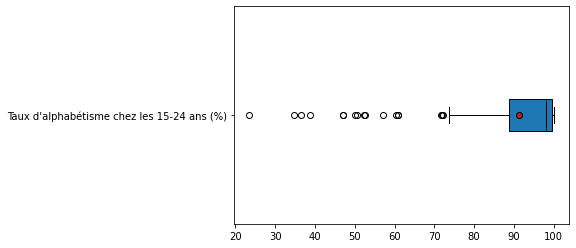

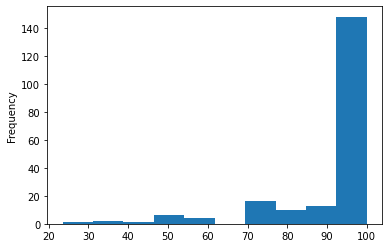

--------------------
Distribution de la variable : Déscolarisation des lycéens (%)
count    201.000000
mean      29.753879
std       21.170667
min        1.040000
25%       11.317297
50%       23.800000
75%       47.760000
max       91.290000
Name: Déscolarisation des lycéens (%), dtype: float64


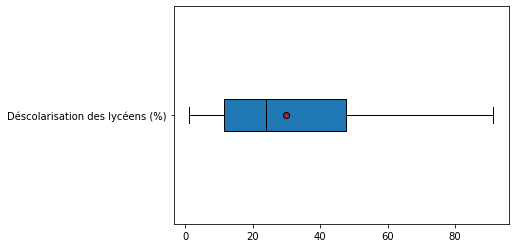

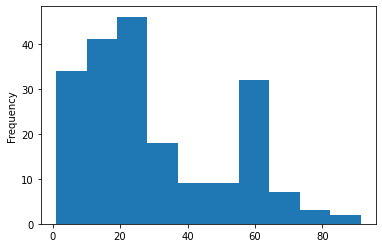

--------------------
Distribution de la variable : Nombre d'inscriptions au lycée
count    2.010000e+02
mean     1.359879e+06
std      5.060722e+06
min      3.530000e+02
25%      6.824740e+04
50%      2.535500e+05
75%      8.389098e+05
max      5.282696e+07
Name: Nombre d'inscriptions au lycée, dtype: float64


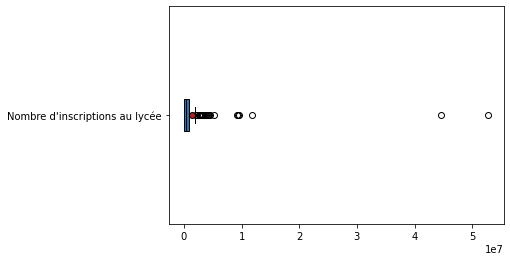

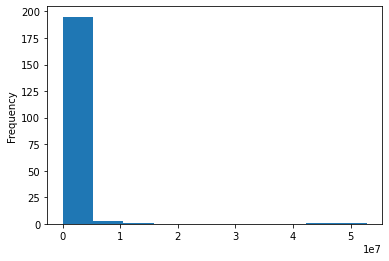

--------------------
Distribution de la variable : Accès à Internet (%)
count    201.000000
mean      42.153444
std       28.002880
min        0.000000
25%       15.930000
50%       41.000000
75%       64.810000
max       96.510000
Name: Accès à Internet (%), dtype: float64


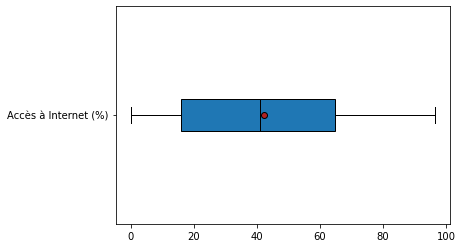

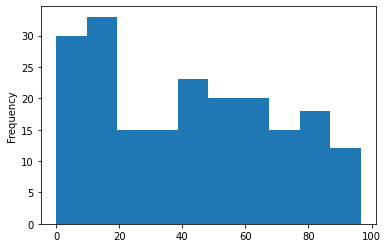

--------------------
Distribution de la variable : Dépenses dans l'éducation (M$)
count       201.000000
mean      18250.019472
std       74425.341380
min           1.799747
25%         270.207536
50%        1258.906536
75%        8591.143825
max      877649.004657
Name: Dépenses dans l'éducation (M$), dtype: float64


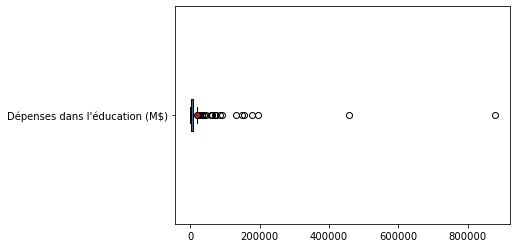

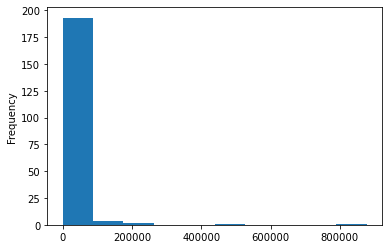

--------------------


In [97]:
cols = data.columns[1:]

for col in cols:
    print("Distribution de la variable : " + col)
    print(data[col].describe())
    plt.boxplot([data[col]], labels=[col], medianprops = {'color':"black"},
            meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'},
           showfliers=True, vert=False, showmeans=True, patch_artist=True)
    plt.show()
    data[col].plot.hist()
    plt.show()
    print("-"*20)

## Analyse bivariée

In [98]:
# mettre en lien deux variables => zones d'intérets
# nuage de points
# confirmer les sentiments que j'ai eu lors de l'analyse univariée
# 2,3 variables à combiner pour sortir des pays du lot

# pop 15 24 et taux alphabetisme
# descolarisation et dépenses dans l'éducation
# nombre d'inscis au lycée et accès internet

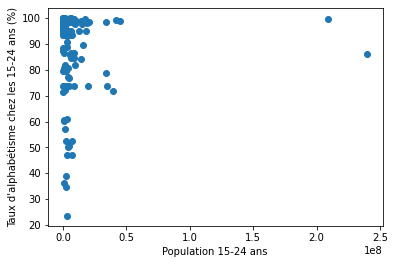

In [109]:
fig = plt.figure(1)
plt.xlabel("Population 15-24 ans")
plt.ylabel("Taux d'alphabétisme chez les 15-24 ans (%)")
plt.plot(data["Population 15-24 ans"], data["Taux d'alphabétisme chez les 15-24 ans (%)"], "o")
plt.show()

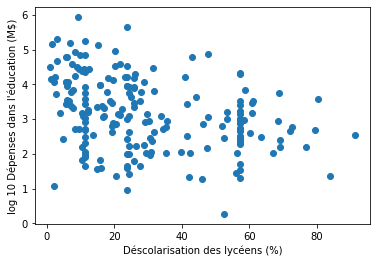

In [110]:
fig = plt.figure(1)
plt.xlabel("Déscolarisation des lycéens (%)")
plt.ylabel("log 10 Dépenses dans l'éducation (M$)")
plt.plot(data["Déscolarisation des lycéens (%)"], np.log10(data["Dépenses dans l'éducation (M$)"]), "o")
plt.show()

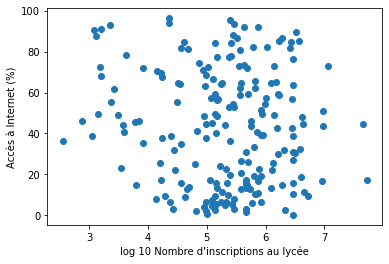

In [112]:
fig = plt.figure(1)
plt.xlabel("log 10 Nombre d'inscriptions au lycée")
plt.ylabel("Accès à Internet (%)")
plt.plot(np.log10(data["Nombre d'inscriptions au lycée"]), data["Accès à Internet (%)"], "o")
plt.show()

## Scoring

In [102]:
# attribuer un score entre 0 et 1
# la valeur du pays - min / max - min
# ajouter croissance de la pop

In [103]:
# "Croissance de la population (%)"
cols = {
    "Déscolarisation des lycéens (%)": 1.5,
    "Accès à Internet (%)": 2,
    "Croissance de la population (%)": 1.2,
    "Population 15-24 ans": 1.2,
    "Taux d'alphabétisme chez les 15-24 ans (%)": 1.7,
    "Nombre d'inscriptions au lycée": 1.2,
    "Dépenses dans l'éducation (M$)": 1
};

for col, coef in cols.items():
    data["Points " + col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min()) * coef

In [104]:
data.insert(0, "Points totaux", data.loc[:, "Points Accès à Internet (%)":].sum(axis=1) - data["Points Déscolarisation des lycéens (%)"])

In [105]:
data.sort_values("Points totaux", ascending=False, inplace=True)

In [107]:
data.head(15)

,Points totaux,Population totale,Population 15-24 ans,Croissance de la population (%),Taux d'alphabétisme chez les 15-24 ans (%),Déscolarisation des lycéens (%),Nombre d'inscriptions au lycée,Accès à Internet (%),Dépenses dans l'éducation (M$),Points Déscolarisation des lycéens (%),Points Accès à Internet (%),Points Croissance de la population (%),Points Population 15-24 ans,Points Taux d'alphabétisme chez les 15-24 ans (%),Points Nombre d'inscriptions au lycée,Points Dépenses dans l'éducation (M$)
China,5.130045,1.357724e+09,2.087167e+08,0.50,99.640000,23.784211,44626746.40,44.59,458568.620673,0.378020,0.924049,0.312922,1.042875,1.691998,1.013725,0.522496
United States,4.893352,3.162575e+08,4.524368e+07,0.74,99.044417,9.340000,11728330.80,73.04,877649.004657,0.137950,1.513626,0.346449,0.226058,1.678759,0.266411,1.000000
Qatar,4.451332,2.216790e+06,1.233850e+05,6.85,98.290000,7.720000,36042.20,81.61,6781.455797,0.111025,1.691224,1.200000,0.000607,1.661990,0.000811,0.007725
United Kingdom,4.085926,6.417615e+07,7.904708e+06,0.75,99.559615,6.900000,3325021.90,89.44,155141.306847,0.097396,1.853487,0.347846,0.039488,1.690211,0.075523,0.176768
Norway,3.983035,5.071329e+06,6.395098e+05,1.15,99.559615,8.910000,246213.60,95.28,32141.733950,0.130803,1.974510,0.403725,0.003186,1.690211,0.005585,0.036621
France,3.951482,6.598297e+07,7.582918e+06,0.48,99.559615,1.660000,2608668.40,81.79,148643.000903,0.010305,1.694954,0.310128,0.037880,1.690211,0.059250,0.169363
Netherlands,3.941433,1.681303e+07,2.002537e+06,0.42,99.559615,3.010000,741759.20,91.82,46141.025318,0.032742,1.902808,0.301746,0.009997,1.690211,0.016842,0.052571
Luxembourg,3.938397,5.440716e+05,6.316183e+04,2.26,99.559615,16.440000,22708.25,93.70,2432.988392,0.255956,1.941768,0.558789,0.000306,1.690211,0.000508,0.002770
Oman,3.926875,3.720050e+06,5.783662e+05,6.12,98.670000,6.120000,137439.75,59.49,3538.369276,0.084432,1.232826,1.098021,0.002881,1.670437,0.003114,0.004030
Japan,3.923089,1.274841e+08,1.235106e+07,-0.12,95.216875,2.970000,3673611.25,85.31,194954.093968,0.032078,1.767900,0.226310,0.061705,1.593681,0.083441,0.222131
